<font color='#006400' size=6 align='center'><p style='text-align: center;'>**Segundo cuaderno de Python** 
<font color='#808080' size=6 align='center'><p style='text-align: center;'>**Yenny Velandia**
<font color='black' size=4 align='center'><p style='text-align: center;'>**13 de junio de 2022**

# VISUALIZACIÓN

### -Seleccionar dos espectros IR y 2 espectros de masas del directorio de data
### -Visualizar en dos graficas los espectros IR y los de masas (matplotlib)
### -Visualizar en 4 gráficas (2,2) los 4 espectros (matplotlib)
### -Visualizar en Bokeh los espectros IR en una y en la otra los espectros de masas
### -Utilizar la función de paneles de bokeh para visualizar los espectros en graficas separadas

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## Selección de espectros
# IR

In [24]:
IR1 = pd.read_csv("https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/FTIR_C1.CSV", header = 1)

IR2 = pd.read_csv("https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/FTIR_C2.CSV", header = 1)

# Masas

In [25]:
M1 = pd.read_csv("https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/MS.txt", sep=" ",header=None)

M2 = pd.read_csv("https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/MS7.txt",sep=" ",header=None)

# GRÁFICAS

# IR

### Espectro IR1

In [26]:
IR1_1 = IR1.set_axis(['x1_ir', 'y1_ir'], axis='columns')
IR1_1.head()

x1_ir     y1_ir
0  400.6456  97.34521
1  401.1277  97.41083
2  401.6098  97.47359
3  402.0919  97.49519
4  402.5741  97.45078

In [27]:
IR2_2 = IR2.set_axis(['x2_ir', 'y2_ir'], axis='columns')
IR2_2.head()

x2_ir     y2_ir
0  400.6456  95.56998
1  401.1277  95.54085
2  401.6098  95.55093
3  402.0919  95.58916
4  402.5741  95.64748

Text(0, 0.5, 'Trasmitancia')

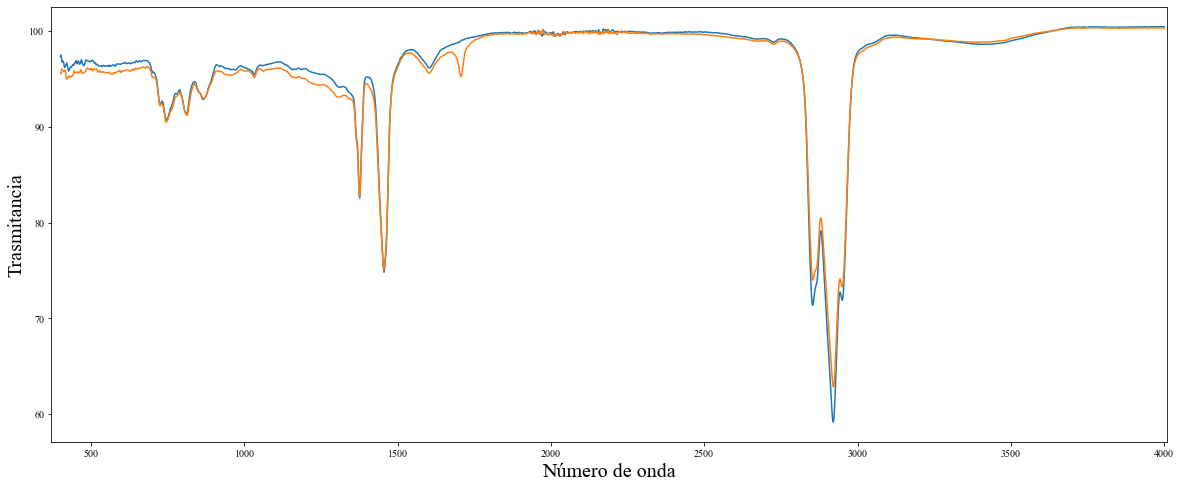

In [45]:
plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.plot(IR1_1['x1_ir'],IR1_1['y1_ir'])

plt.plot(IR2_2['x2_ir'], IR2_2['y2_ir'])

plt.xlim((370,4010))
plt.xlabel('Número de onda',  fontsize=20)
plt.ylabel('Trasmitancia', fontsize=20)

# Masas 

In [29]:
M1.set_axis(['mx1', 'my1'], axis='columns', inplace=True)
M2.set_axis(['mx2', 'my2'], axis='columns', inplace=True)

Text(0, 0.5, 'Abundancia relativa')

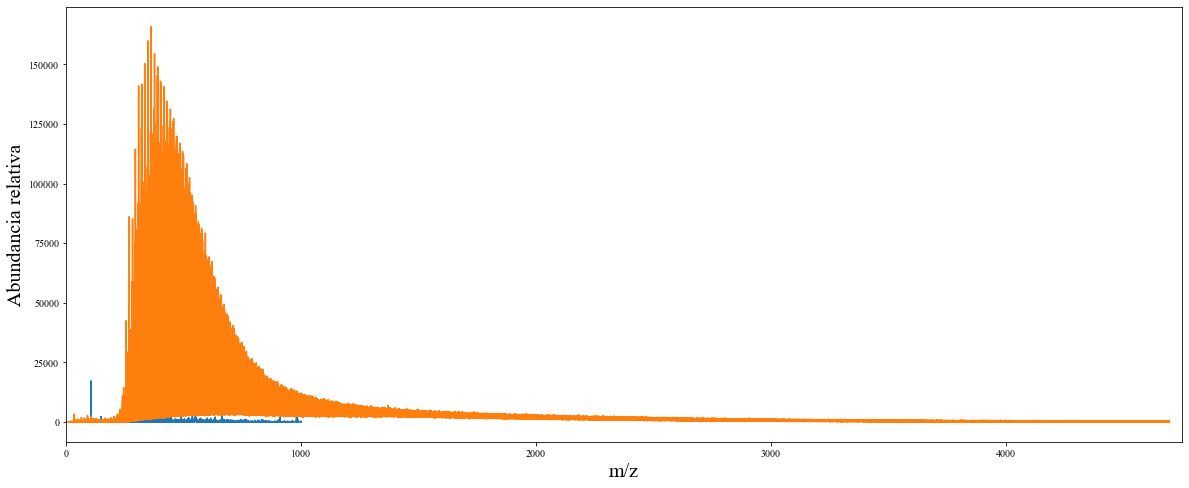

In [39]:
plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.plot(M1['mx1'], M1['my1'])
plt.plot(M2['mx2'], M2['my2'])

plt.xlim((0,4750))
plt.xlabel('m/z',  fontsize=20)
plt.ylabel('Abundancia relativa', fontsize=20)

# VISUALIZACIÓN 2x2

Text(0, 0.5, 'Abundancia relativa')

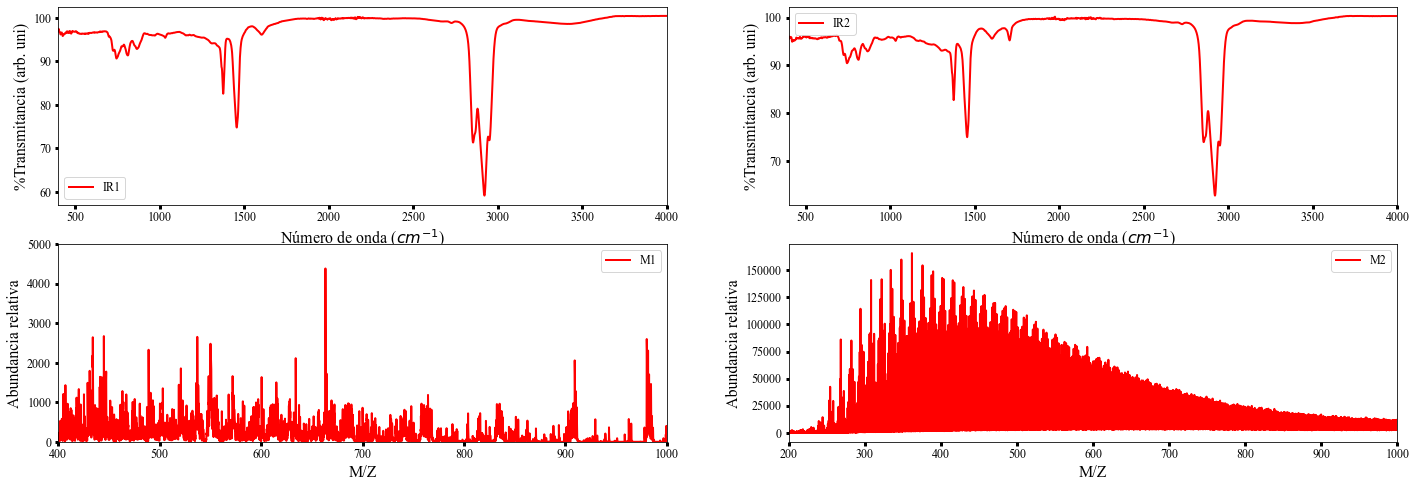

In [31]:
fig, ax = plt.subplots(2,2, figsize=(24,8))
plt.rcParams["font.family"] = 'Times New Roman'

#gráfica 1

plt.rcParams["font.family"] = 'Times New Roman'
ax[0,0].plot(IR1_1['x1_ir'], IR1_1['y1_ir'], 'r', label='IR1', markersize=5, lw=2)
ax[0,0].legend(loc='best', fontsize=12)
ax[0,0].set_xlim(400, 4000)
ax[0,0].tick_params(axis='both', labelsize=12, width=3)
ax[0,0].set_xlabel('Número de onda ($cm^{-1}$)',  fontsize=16)
ax[0,0].set_ylabel('%Transmitancia (arb. uni)', fontsize=16)


#gráfica 2

plt.rcParams["font.family"] = 'Times New Roman'
ax[0,1].plot(IR2_2['x2_ir'], IR2_2['y2_ir'], 'r', label='IR2', markersize=5, lw=2)
ax[0,1].legend(loc='best', fontsize=12)
ax[0,1].set_xlim(400, 4000)
ax[0,1].tick_params(axis='both', labelsize=12, width=3)
ax[0,1].set_xlabel('Número de onda ($cm^{-1}$)',  fontsize=16)
ax[0,1].set_ylabel('%Transmitancia (arb. uni)', fontsize=16)

#gráfica 3
plt.rcParams["font.family"] = 'Times New Roman'
ax[1,0].plot(M1['mx1'], M1['my1'], 'r', label='M1', markersize=5, lw=2)
ax[1,0].legend(loc='best', fontsize=12)
ax[1,0].set_xlim(400, 1000)
ax[1,0].set_ylim(0, 5000)
ax[1,0].tick_params(axis='both', labelsize=12, width=3)
ax[1,0].set_xlabel('M/Z',  fontsize=16)
ax[1,0].set_ylabel('Abundancia relativa', fontsize=16)


#gráfica 4

plt.rcParams["font.family"] = 'Times New Roman'
ax[1,1].plot(M2['mx2'], M2['my2'], 'r', label='M2', markersize=5, lw=2)
ax[1,1].legend(loc='best', fontsize=12)
ax[1,1].set_xlim(200, 1000)
#ax[1,1].set_ylim(0, 10000)
ax[1,1].tick_params(axis='both', labelsize=12, width=3)
ax[1,1].set_xlabel('M/Z',  fontsize=16)
ax[1,1].set_ylabel('Abundancia relativa', fontsize=16)


# BOKEH


# IR

In [32]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
from bokeh.models import Segment, ColumnDataSource
from bokeh.models import Range1d

output_notebook() 

TOOLS = "zoom_in,zoom_out,box_zoom,undo,redo,reset,save,box_select,poly_select,lasso_select,"

# Graficación

p = figure(title='IR1 & IR2', plot_width=900, plot_height=500, x_axis_label='Número de onda ($cm^{-1}$)', y_axis_label='%Transmitancia (arb. uni)', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3
p.line(IR1_1["x1_ir"], IR1_1["y1_ir"], line_width=2, color="yellow", alpha=0.8)
p.line(IR2_2["x2_ir"], IR2_2['y2_ir'], line_width=2, color="red", alpha=0.8)

#p.legend.location = "bottom_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

Loading BokehJS ...

# MASAS

In [33]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
from bokeh.models import Segment, ColumnDataSource

output_notebook() 

TOOLS = "zoom_in,zoom_out,box_zoom,undo,redo,reset,save,box_select,poly_select,lasso_select,"

# Graficación

p = figure(title='M1 & M2', plot_width=900, plot_height=500, x_axis_label='M/Z', y_axis_label='Abundancia relativa', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3
p.line(M1["mx1"], M1["my1"], line_width=2, color="yellow", alpha=0.8)
p.line(M2["mx2"], M2["my2"], line_width=2, color="red", alpha=0.8)

#p.legend.location = "bottom_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

Loading BokehJS ...